Merge all the CSV data files provided and create a DataFrame:

In [156]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Function to merge CSV files in a folder
def merge_csv_files(folder_path):
    try:
        # List all CSV files in the folder
        csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

        # Initialize an empty list to store DataFrame objects
        dfs = []

        # Read each CSV file and append its DataFrame to the list
        for file in csv_files:
            file_path = os.path.join(folder_path, file)
            try:
                # Try reading the CSV file with different encodings
                df = pd.read_csv(file_path, encoding='utf-8')
            except UnicodeDecodeError:
                try:
                    df = pd.read_csv(file_path, encoding='latin-1')
                except UnicodeDecodeError:
                    df = pd.read_csv(file_path, encoding='ISO-8859-1')
            dfs.append(df)

        # Concatenate all DataFrames into a single DataFrame
        merged_df = pd.concat(dfs, ignore_index=True)
        
        return merged_df
    except Exception as e:
        print("An error occurred:", e)

# Specify the folder path containing CSV files
folder_path = 'C:/Users/hp/Downloads/zen class 1/project/DataSets-20240430T111853Z-001/DataSets'

# Merge CSV files in the folder
merged_df = merge_csv_files(folder_path)

# Now you have the merged DataFrame containing data from all CSV files in the folder


In [157]:
# Separate state and district names
merged_df[['STATE', 'District']] = merged_df['India/States'].str.split(' - ', expand=True)

# Function to separate state and district names
def separate_state_district(row):
    # Split the string based on the separator '-'
    parts = row.split(' - ')
    
    # If the first part is in uppercase (assumed to be state name), return it
    if parts[0].isupper():
        return parts[0]
    else:
        return None

# Apply the function to create a new column for state names
merged_df['State Name'] = merged_df['District'].apply(separate_state_district)

# Filter out None values and then print unique state names with commas
state_names = merged_df['State Name'].dropna().unique()
print(", ".join(state_names))


NCT OF DELHI, TRIPURA, JHARKHAND, GUJARAT, MAHARASHTRA, KARNATAKA, GOA, KERALA, TAMIL NADU, PUDUCHERRY, HIMACHAL PRADESH, UTTARAKHAND, UTTAR PRADESH, BIHAR, SIKKIM, NAGALAND, ASSAM, ODISHA, RAJASTHAN, ARUNACHAL PRADESH, MANIPUR, MIZORAM, WEST BENGAL


In [158]:
# Save DataFrame to CSV
merged_df.to_csv('human_resource2.csv', index=False)

Perform Data Exploration (EDA):

In [98]:
merged_df["India/States"].unique()

array(['STATE - NCT OF DELHI', 'District - North West',
       'District - North', 'District - North East', 'District - East',
       'District - New Delhi', 'District - Central', 'District - West',
       'District - South West', 'District - South', 'STATE - TRIPURA',
       'District - West Tripura', 'District - South Tripura',
       'District - Dhalai', 'District - North Tripura',
       'STATE - JHARKHAND', 'District - Garhwa', 'District - Chatra',
       'District - Kodarma', 'District - Giridih', 'District - Deoghar',
       'District - Godda', 'District - Sahibganj', 'District - Pakur',
       'District - Dhanbad', 'District - Bokaro', 'District - Lohardaga',
       'District - Purbi Singhbhum', 'District - Palamu',
       'District - Latehar', 'District - Hazaribagh',
       'District - Ramgarh', 'District - Dumka', 'District - Jamtara',
       'District - Ranchi', 'District - Khunti', 'District - Gumla',
       'District - Simdega', 'District - Pashchimi Singhbhum',
       'D

In [99]:
# Function to extract unique state names from the "India/States" column
def extract_states(data):
    # Split the entries by the string " - "
    split_data = data.str.split(" - ", expand=True)
    
    # The first part of the split will contain the state names
    states = split_data.iloc[:, 0].unique()
    
    return states

# Extract unique state names
unique_states = extract_states(merged_df["India/States"])
print(unique_states)


['STATE' 'District']


In [100]:
merged_df.shape

(195145, 28)

In [101]:
merged_df.columns

Index(['State Code', 'District Code', 'India/States', 'Division', 'Group',
       'Class', 'NIC Name', 'Main Workers - Total -  Persons',
       'Main Workers - Total - Males', 'Main Workers - Total - Females',
       'Main Workers - Rural -  Persons', 'Main Workers - Rural - Males',
       'Main Workers - Rural - Females', 'Main Workers - Urban -  Persons',
       'Main Workers - Urban - Males', 'Main Workers - Urban - Females',
       'Marginal Workers - Total -  Persons',
       'Marginal Workers - Total - Males',
       'Marginal Workers - Total - Females',
       'Marginal Workers - Rural -  Persons',
       'Marginal Workers - Rural - Males',
       'Marginal Workers - Rural - Females',
       'Marginal Workers - Urban -  Persons',
       'Marginal Workers - Urban - Males',
       'Marginal Workers - Urban - Females', 'STATE', 'District',
       'State Name'],
      dtype='object')

In [150]:
# Data Exploration
merged_df.head() # Display the first few rows of the merged DataFrame
#print(merged_df.info()) # Display information about the DataFrame (e.g., data types, missing values)


State Code District Code          India/States Division Group  Class  \
0        `07          `000  STATE - NCT OF DELHI      `00  `000  `0000   
1        `07          `000  STATE - NCT OF DELHI      `01  `000  `0000   
2        `07          `000  STATE - NCT OF DELHI      `01  `011  `0000   
3        `07          `000  STATE - NCT OF DELHI      `01  `011  `0111   
4        `07          `000  STATE - NCT OF DELHI      `01  `011  `0112   

                                            NIC Name  \
0                                              Total   
1  Crop and animal production, hunting and relate...   
2                     Growing of non-perennial crops   
3  Growing of cereals (except rice), leguminous c...   
4                                    Growing of rice   

   Main Workers - Total -  Persons  Main Workers - Total - Males  \
0                           828980                        708129   
1                             1484                          1271   
2                              169                           151   
3                               83                            81   
4                                9                             9   

   Main Workers - Total - Females  ...  Marginal Workers - Total - Females  \
0                          120851  ...                               16266   
1                             213  ...                                  74   
2                              18  ...                                  27   
3                               2  ...                                  10   
4                               0  ...                                   0   

   Marginal Workers - Rural -  Persons  Marginal Workers - Rural - Males  \
0                                 1969                              1494   
1                                   23                                13   
2                                   14                                12   
3                                    8                                 6   
4                                    0                                 0   

   Marginal Workers - Rural - Females  Marginal Workers - Urban -  Persons  \
0                                 475                                59040   
1                                  10                                  201   
2                                   2                                   78   
3                                   2                                   29   
4                                   0                                    0   

   Marginal Workers - Urban - Males  Marginal Workers - Urban - Females  \
0                             43249                               15791   
1                               137                                  64   
2                                53                                  25   
3                                21                                   8   
4                                 0                                   0   

   STATE      District    State Name  
0  STATE  NCT OF DELHI  NCT OF DELHI  
1  STATE  NCT OF DELHI  NCT OF DELHI  
2  STATE  NCT OF DELHI  NCT OF DELHI  
3  STATE  NCT OF DELHI  NCT OF DELHI  
4  STATE  NCT OF DELHI  NCT OF DELHI  

[5 rows x 28 columns]

In [151]:
merged_df["State Code"].unique()

array(['`07', '`16', '`20', '`24', '`27', '`29', '`30', '`32', '`33',
       '`34', '`02', '`05', '`09', '`10', '`11', '`13', '`18', '`21',
       '`08', '`12', '`14', '`15', '`19'], dtype=object)

In [104]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195145 entries, 0 to 195144
Data columns (total 28 columns):
 #   Column                               Non-Null Count   Dtype 
---  ------                               --------------   ----- 
 0   State Code                           195145 non-null  object
 1   District Code                        195145 non-null  object
 2   India/States                         195145 non-null  object
 3   Division                             195145 non-null  object
 4   Group                                195145 non-null  object
 5   Class                                195145 non-null  object
 6   NIC Name                             195145 non-null  object
 7   Main Workers - Total -  Persons      195145 non-null  int64 
 8   Main Workers - Total - Males         195145 non-null  int64 
 9   Main Workers - Total - Females       195145 non-null  int64 
 10  Main Workers - Rural -  Persons      195145 non-null  int64 
 11  Main Workers - Rural - Mal

In [105]:
# Handling Missing Values
# Check for missing values in the DataFrame
missing_values = merged_df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 State Code                                  0
District Code                               0
India/States                                0
Division                                    0
Group                                       0
Class                                       0
NIC Name                                    0
Main Workers - Total -  Persons             0
Main Workers - Total - Males                0
Main Workers - Total - Females              0
Main Workers - Rural -  Persons             0
Main Workers - Rural - Males                0
Main Workers - Rural - Females              0
Main Workers - Urban -  Persons             0
Main Workers - Urban - Males                0
Main Workers - Urban - Females              0
Marginal Workers - Total -  Persons         0
Marginal Workers - Total - Males            0
Marginal Workers - Total - Females          0
Marginal Workers - Rural -  Persons         0
Marginal Workers - Rural - Males            0
Marginal Workers 

In [106]:
# Removing Duplicates
# Check for duplicate rows in the DataFrame
duplicate_rows = merged_df.duplicated()
print("Duplicate Rows:\n", duplicate_rows)

Duplicate Rows:
 0         False
1         False
2         False
3         False
4         False
          ...  
195140    False
195141    False
195142    False
195143    False
195144    False
Length: 195145, dtype: bool


In [107]:
# Summary statistics
summary_stats = merged_df.describe()
print(summary_stats)

       Main Workers - Total -  Persons  Main Workers - Total - Males  \
count                     1.951450e+05                  1.951450e+05   
mean                      1.492138e+03                  1.193171e+03   
std                       4.568169e+04                  3.773917e+04   
min                       0.000000e+00                  0.000000e+00   
25%                       6.000000e+00                  6.000000e+00   
50%                       2.800000e+01                  2.300000e+01   
75%                       1.880000e+02                  1.450000e+02   
max                       1.561976e+07                  1.280140e+07   

       Main Workers - Total - Females  Main Workers - Rural -  Persons  \
count                    1.951450e+05                     1.951450e+05   
mean                     2.989664e+02                     6.606187e+02   
std                      8.582019e+03                     2.044436e+04   
min                      0.000000e+00                  

In [108]:
merged_df.describe(include="all")

State Code District Code         India/States Division   Group   Class  \
count      195145        195145               195145   195145  195145  195145   
unique         23           472                  491       89     241     423   
top           `08          `000  STATE - WEST BENGAL      `47    `000   `0000   
freq        21662         14715                  749    12246   31682   96924   
mean          NaN           NaN                  NaN      NaN     NaN     NaN   
std           NaN           NaN                  NaN      NaN     NaN     NaN   
min           NaN           NaN                  NaN      NaN     NaN     NaN   
25%           NaN           NaN                  NaN      NaN     NaN     NaN   
50%           NaN           NaN                  NaN      NaN     NaN     NaN   
75%           NaN           NaN                  NaN      NaN     NaN     NaN   
max           NaN           NaN                  NaN      NaN     NaN     NaN   

                         NIC Name  Main Workers - Total -  Persons  \
count                      195145                     1.951450e+05   
unique                        587                              NaN   
top     Construction of buildings                              NaN   
freq                         1446                              NaN   
mean                          NaN                     1.492138e+03   
std                           NaN                     4.568169e+04   
min                           NaN                     0.000000e+00   
25%                           NaN                     6.000000e+00   
50%                           NaN                     2.800000e+01   
75%                           NaN                     1.880000e+02   
max                           NaN                     1.561976e+07   

        Main Workers - Total - Males  Main Workers - Total - Females  ...  \
count                   1.951450e+05                    1.951450e+05  ...   
unique                           NaN                             NaN  ...   
top                              NaN                             NaN  ...   
freq                             NaN                             NaN  ...   
mean                    1.193171e+03                    2.989664e+02  ...   
std                     3.773917e+04                    8.582019e+03  ...   
min                     0.000000e+00                    0.000000e+00  ...   
25%                     6.000000e+00                    0.000000e+00  ...   
50%                     2.300000e+01                    3.000000e+00  ...   
75%                     1.450000e+02                    2.400000e+01  ...   
max                     1.280140e+07                    2.818356e+06  ...   

        Marginal Workers - Total - Females  \
count                         1.951450e+05   
unique                                 NaN   
top                                    NaN   
freq                                   NaN   
mean                          1.816350e+02   
std                           6.309699e+03   
min                           0.000000e+00   
25%                           0.000000e+00   
50%                           0.000000e+00   
75%                           6.000000e+00   
max                           1.867372e+06   

        Marginal Workers - Rural -  Persons  Marginal Workers - Rural - Males  \
count                          1.951450e+05                      1.951450e+05   
unique                                  NaN                               NaN   
top                                     NaN                               NaN   
freq                                    NaN                               NaN   
mean                           2.502286e+02                      1.165241e+02   
std                            8.232274e+03                      3.723078e+03   
min                            0.000000e+00                      0.000000e+00   
25%                            0.000000e+00                      0.

In [162]:
merged_df.columns

Index(['State Code', 'District Code', 'India/States', 'Division', 'Group',
       'Class', 'NIC Name', 'Main Workers - Total -  Persons',
       'Main Workers - Total - Males', 'Main Workers - Total - Females',
       'Main Workers - Rural -  Persons', 'Main Workers - Rural - Males',
       'Main Workers - Rural - Females', 'Main Workers - Urban -  Persons',
       'Main Workers - Urban - Males', 'Main Workers - Urban - Females',
       'Marginal Workers - Total -  Persons',
       'Marginal Workers - Total - Males',
       'Marginal Workers - Total - Females',
       'Marginal Workers - Rural -  Persons',
       'Marginal Workers - Rural - Males',
       'Marginal Workers - Rural - Females',
       'Marginal Workers - Urban -  Persons',
       'Marginal Workers - Urban - Males',
       'Marginal Workers - Urban - Females', 'Cluster'],
      dtype='object')

In [15]:
# Create a new feature for total number of workers

merged_df['Total_workers'] = (merged_df['Main Workers - Total -  Persons'] + merged_df['Marginal Workers - Total -  Persons'])



Visualization


c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with 

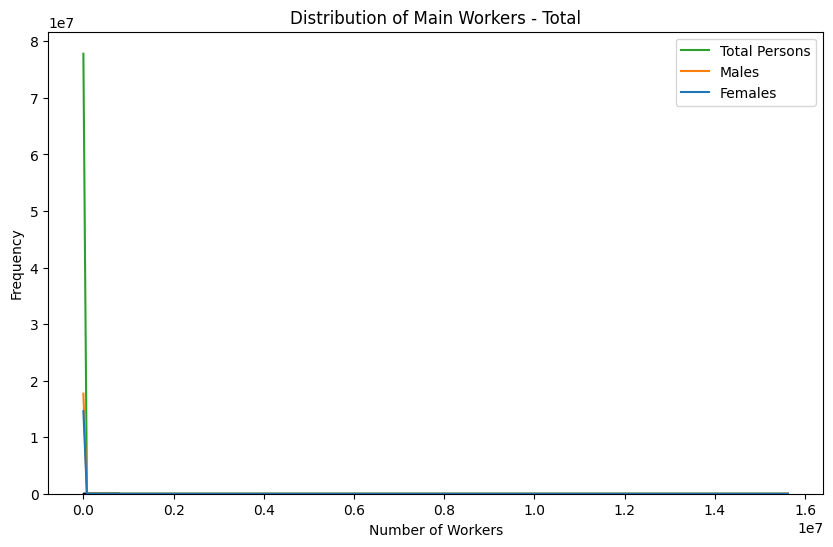

In [109]:
# Main Workers - Total
plt.figure(figsize=(10, 6))
sns.histplot(merged_df[['Main Workers - Total -  Persons', 'Main Workers - Total - Males', 'Main Workers - Total - Females']], bins=20, kde=True)
plt.legend(['Total Persons', 'Males', 'Females'])
plt.xlabel('Number of Workers')
plt.ylabel('Frequency')
plt.title('Distribution of Main Workers - Total')
plt.show()

c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with 

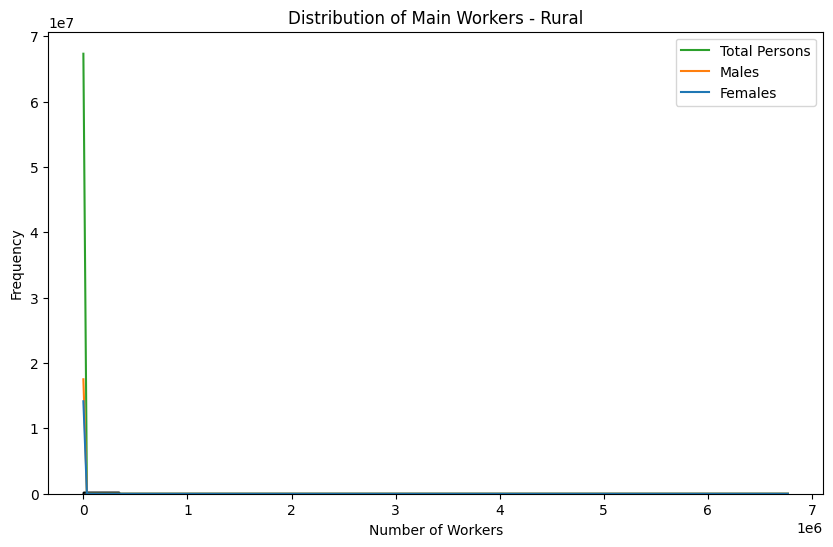

In [110]:
# Main Workers - Rural
plt.figure(figsize=(10, 6))
sns.histplot(merged_df[['Main Workers - Rural -  Persons', 'Main Workers - Rural - Males', 'Main Workers - Rural - Females']], bins=20, kde=True)
plt.legend(['Total Persons', 'Males', 'Females'])
plt.xlabel('Number of Workers')
plt.ylabel('Frequency')
plt.title('Distribution of Main Workers - Rural')
plt.show()


c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(

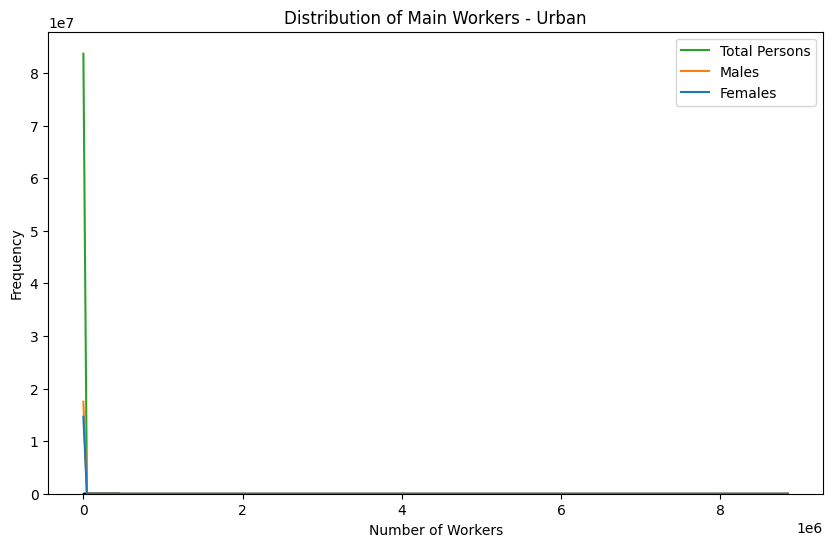

In [17]:
# Main Workers - Urban
plt.figure(figsize=(10, 6))
sns.histplot(merged_df[['Main Workers - Urban -  Persons', 'Main Workers - Urban - Males', 'Main Workers - Urban - Females']], bins=20, kde=True)
plt.legend(['Total Persons', 'Males', 'Females'])
plt.xlabel('Number of Workers')
plt.ylabel('Frequency')
plt.title('Distribution of Main Workers - Urban')
plt.show()

c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(

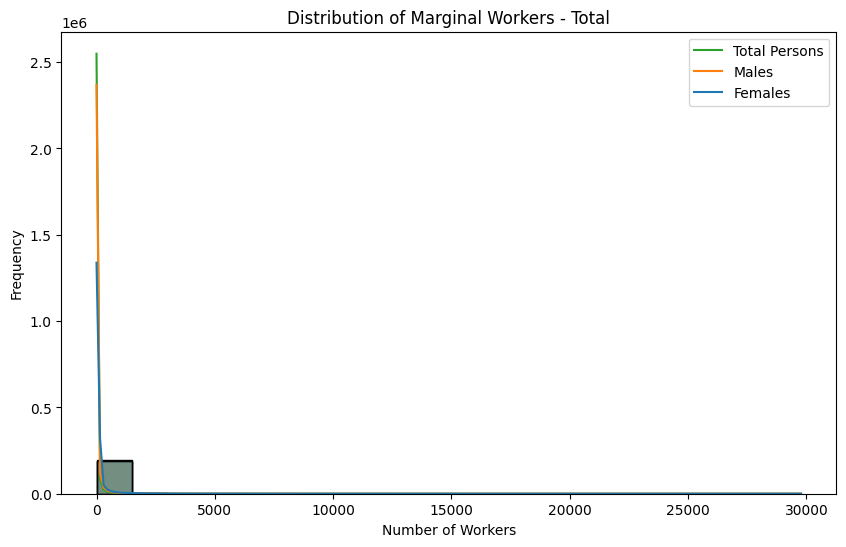

In [22]:
# Marginal Workers - Total
plt.figure(figsize=(10, 6))
sns.histplot(merged_df[['Marginal Workers - Total -  Persons', 'Marginal Workers - Total - Males', 'Marginal Workers - Total - Females']], bins=20, kde=True)
plt.legend(['Total Persons', 'Males', 'Females'])
plt.xlabel('Number of Workers')
plt.ylabel('Frequency')
plt.title('Distribution of Marginal Workers - Total')
plt.show()

c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(

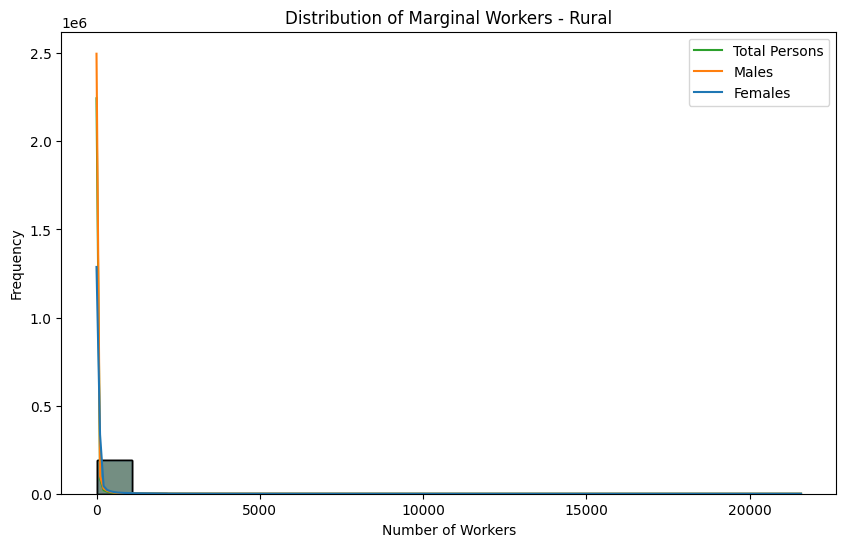

In [23]:
# Marginal Workers - Rural
plt.figure(figsize=(10, 6))
sns.histplot(merged_df[['Marginal Workers - Rural -  Persons', 'Marginal Workers - Rural - Males', 'Marginal Workers - Rural - Females']], bins=20, kde=True)
plt.legend(['Total Persons', 'Males', 'Females'])
plt.xlabel('Number of Workers')
plt.ylabel('Frequency')
plt.title('Distribution of Marginal Workers - Rural')
plt.show()

c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(

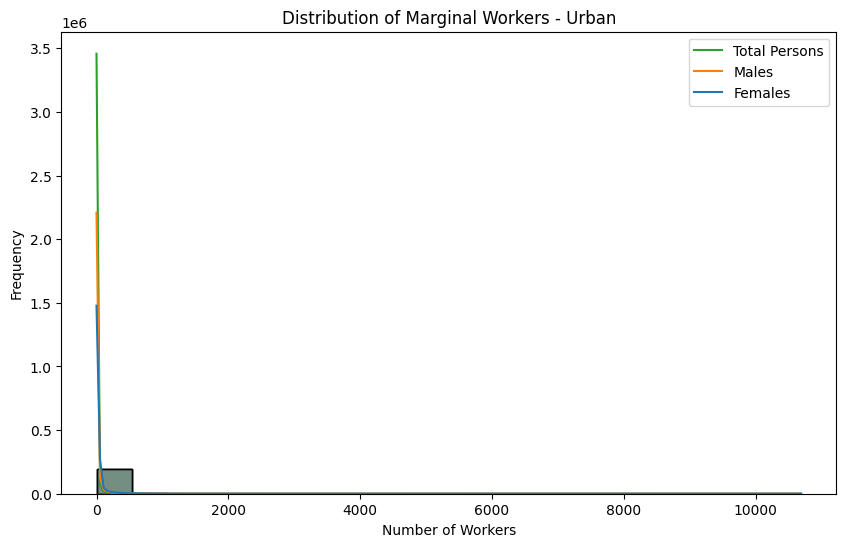

In [24]:
# Marginal Workers - Urban
plt.figure(figsize=(10, 6))
sns.histplot(merged_df[['Marginal Workers - Urban -  Persons', 'Marginal Workers - Urban - Males', 'Marginal Workers - Urban - Females']], bins=20, kde=True)
plt.legend(['Total Persons', 'Males', 'Females'])
plt.xlabel('Number of Workers')
plt.ylabel('Frequency')
plt.title('Distribution of Marginal Workers - Urban')
plt.show()

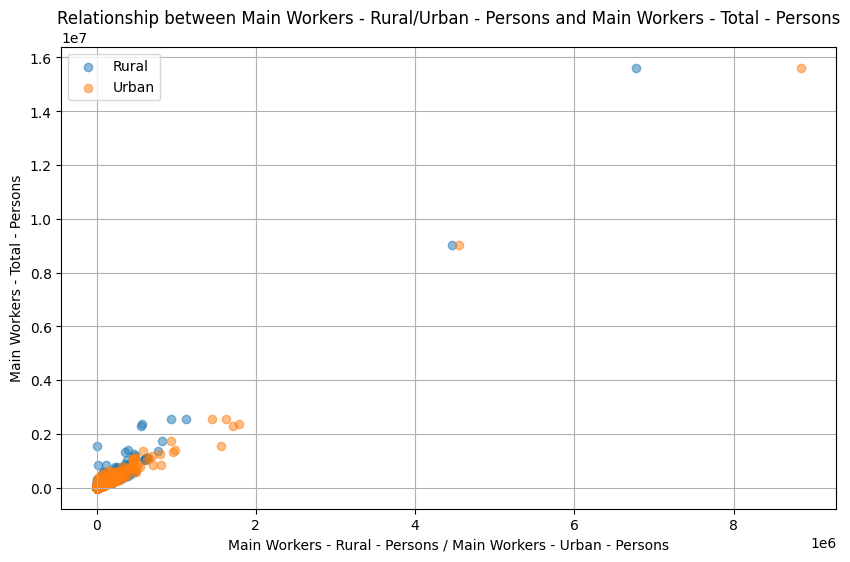

In [153]:
import matplotlib.pyplot as plt

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['Main Workers - Rural -  Persons'], merged_df['Main Workers - Total -  Persons'], label='Rural', alpha=0.5)
plt.scatter(merged_df['Main Workers - Urban -  Persons'], merged_df['Main Workers - Total -  Persons'], label='Urban', alpha=0.5)
plt.xlabel('Main Workers - Rural - Persons / Main Workers - Urban - Persons')
plt.ylabel('Main Workers - Total - Persons')
plt.title('Relationship between Main Workers - Rural/Urban - Persons and Main Workers - Total - Persons')
plt.legend()
plt.grid(True)
plt.show()


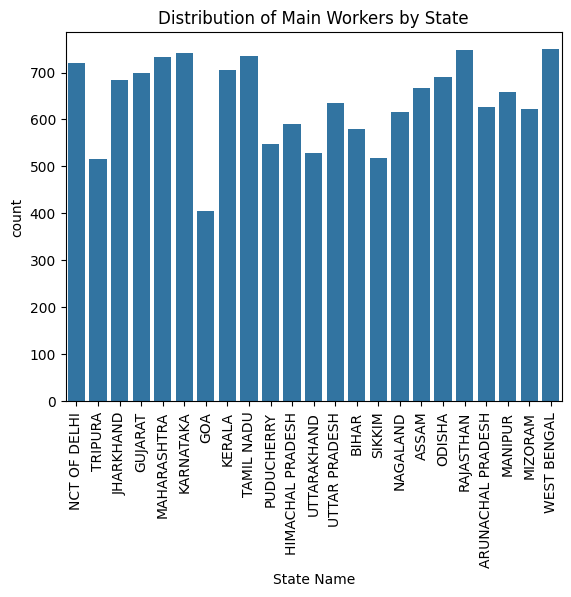

In [155]:
# Count plot for a categorical column
sns.countplot(x='State Name', data=merged_df)
plt.xticks(rotation=90)
plt.title('Distribution of Main Workers by State')
plt.show()


c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.

c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.



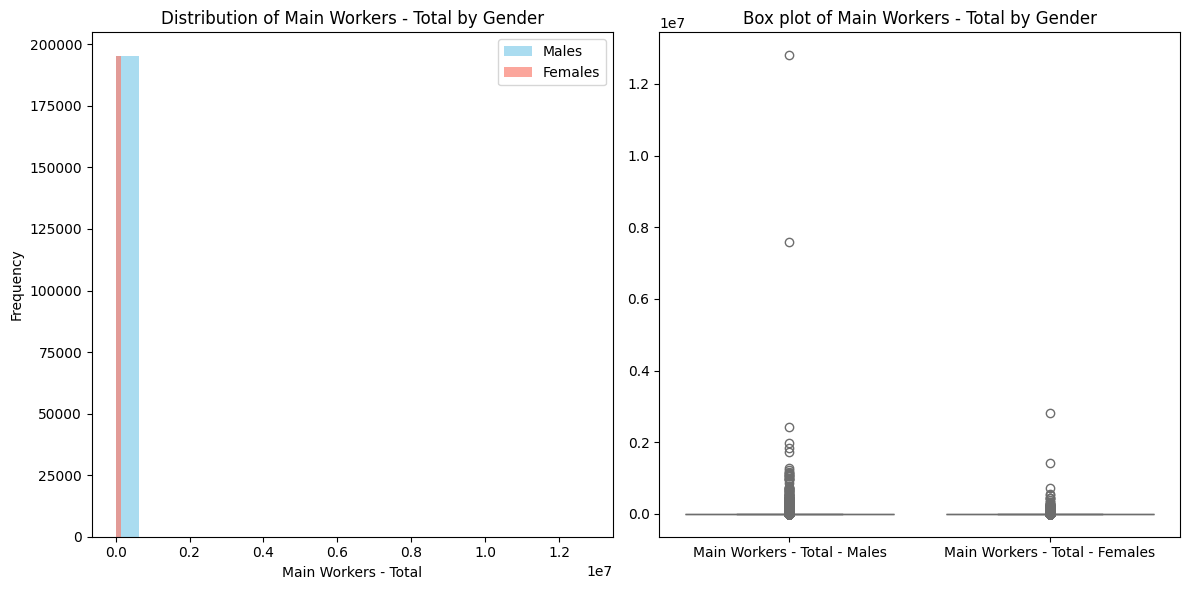

In [154]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for 'Main Workers - Total - Persons'
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(merged_df['Main Workers - Total - Males'], bins=20, color='skyblue', alpha=0.7, label='Males')
plt.hist(merged_df['Main Workers - Total - Females'], bins=20, color='salmon', alpha=0.7, label='Females')
plt.xlabel('Main Workers - Total')
plt.ylabel('Frequency')
plt.title('Distribution of Main Workers - Total by Gender')
plt.legend()

# Box plot for 'Main Workers - Total - Persons'
plt.subplot(1, 2, 2)
sns.boxplot(data=merged_df[['Main Workers - Total - Males', 'Main Workers - Total - Females']], palette=['skyblue', 'salmon'])
plt.title('Box plot of Main Workers - Total by Gender')

plt.tight_layout()
plt.show()



c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


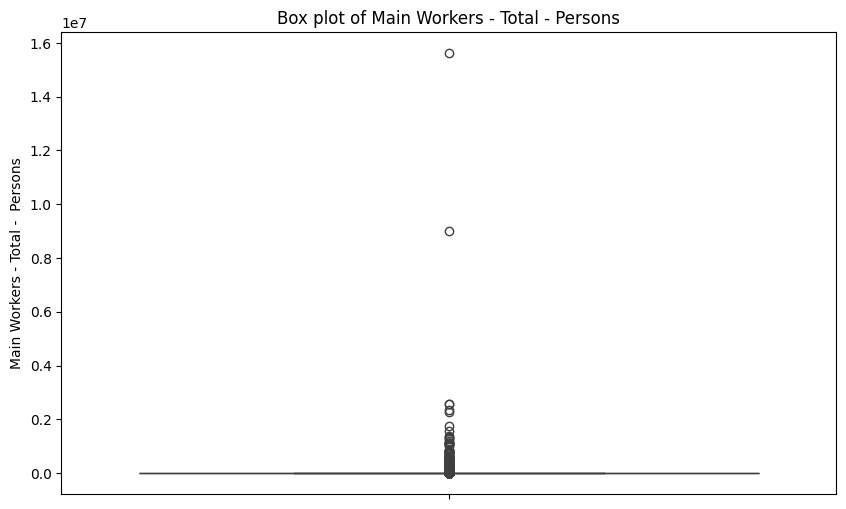

In [23]:
import seaborn as sns

# Box plot for 'Main Workers - Total - Persons'
plt.figure(figsize=(10, 6))
sns.boxplot(y=merged_df['Main Workers - Total -  Persons'])
plt.title('Box plot of Main Workers - Total - Persons')
plt.show()




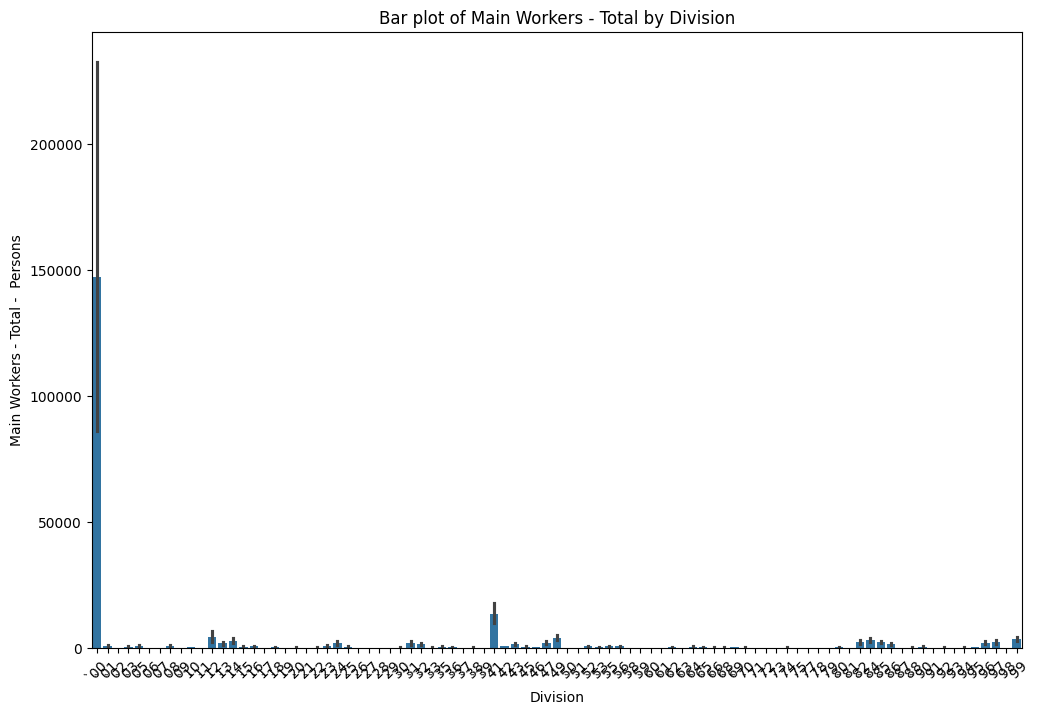

In [114]:
# Bar plot for 'Main Workers - Total' by 'Division'
plt.figure(figsize=(12, 8))
sns.barplot(x='Division', y='Main Workers - Total -  Persons', data=merged_df)
plt.title('Bar plot of Main Workers - Total by Division')
plt.xticks(rotation=45)
plt.show()



c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(

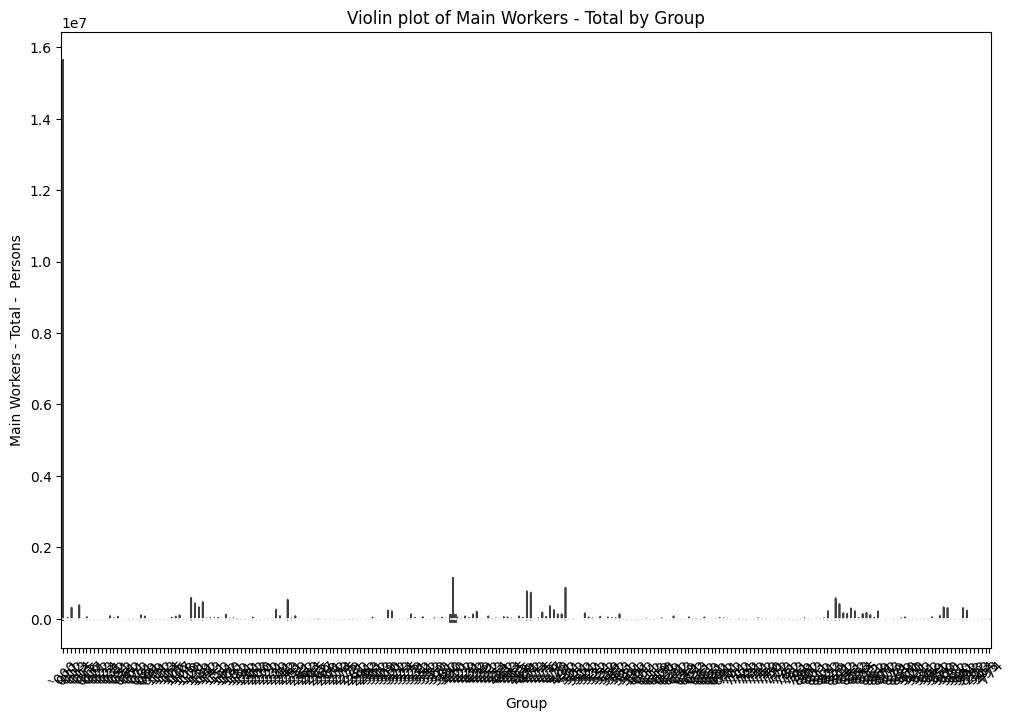

In [27]:
# Violin plot for 'Main Workers - Total' by 'Group'
plt.figure(figsize=(12, 8))
sns.violinplot(x='Group', y='Main Workers - Total -  Persons', data=merged_df)
plt.title('Violin plot of Main Workers - Total by Group')
plt.xticks(rotation=45)
plt.show()



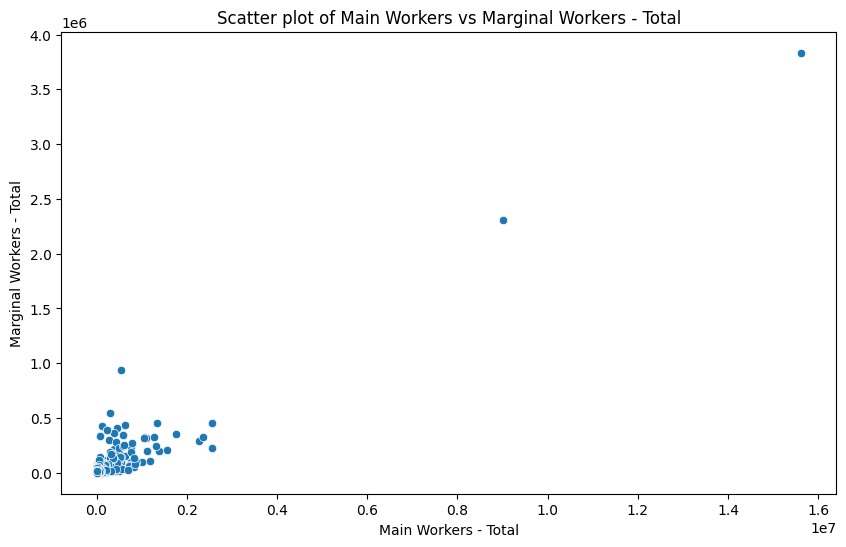

In [30]:
# Scatter plot for 'Main Workers - Total' vs 'Marginal Workers - Total'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Main Workers - Total -  Persons', y='Marginal Workers - Total -  Persons', data=merged_df)
plt.title('Scatter plot of Main Workers vs Marginal Workers - Total')
plt.xlabel('Main Workers - Total')
plt.ylabel('Marginal Workers - Total')
plt.show()

In [40]:
merged_df["Main Workers - Total -  Persons"]

0         828980
1           1484
2            169
3             83
4              9
           ...  
195140        18
195141      8244
195142      8244
195143      8324
195144      8324
Name: Main Workers - Total -  Persons, Length: 195145, dtype: int64

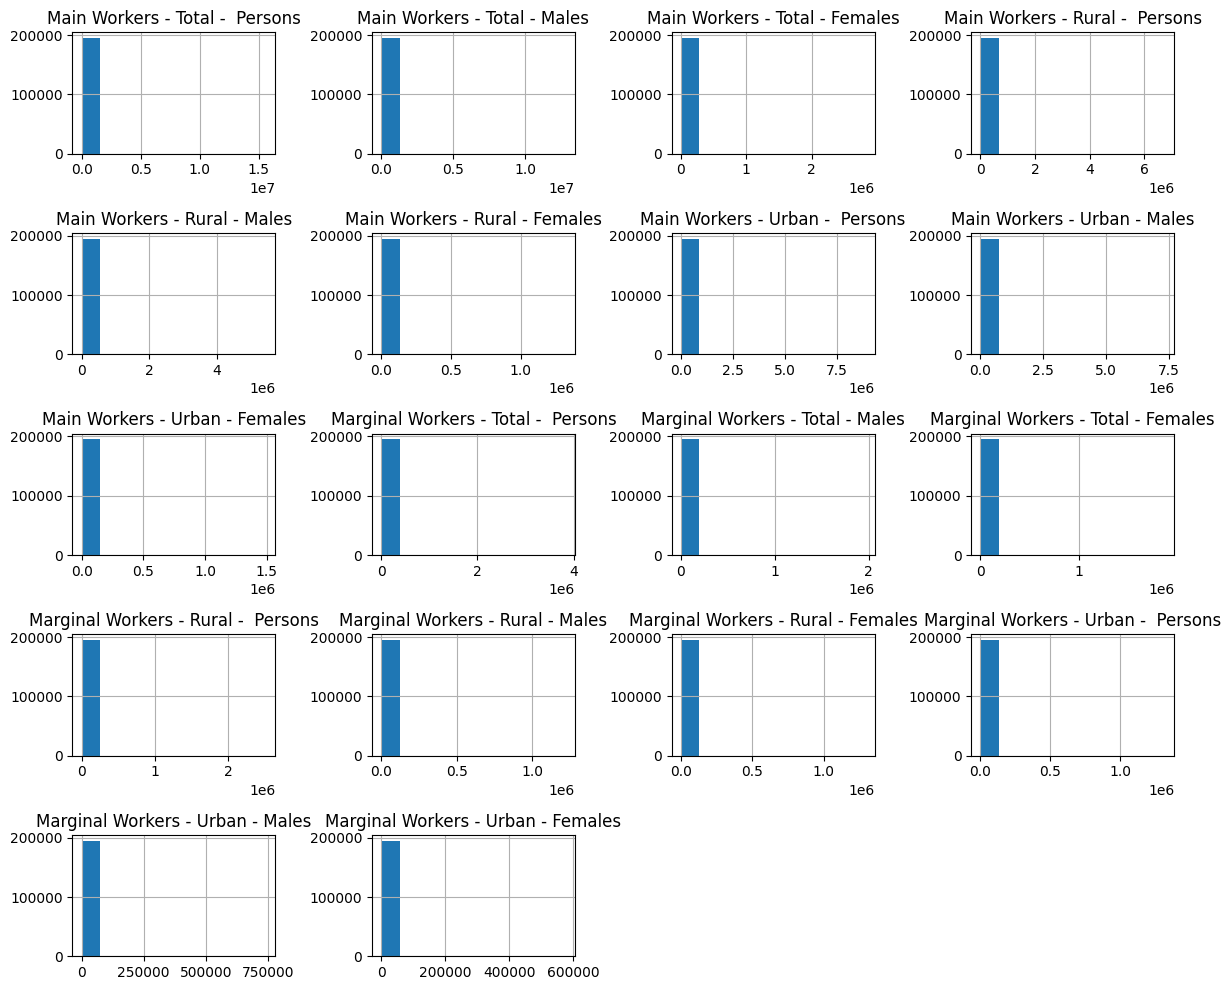

In [12]:


# Histograms for numerical columns
merged_df.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

# Box plots for numerical columns
sns.boxplot(data=merged_df, orient="h")
plt.show()

# Scatter plot for relationship visualization
sns.pairplot(merged_df)
plt.show()


In [49]:
# Cross-tabulation between 'Class' and 'Division'
pd.crosstab(merged_df['Class'], merged_df['Division'])


Division  `00   `01   `02  `03  `05  `06  `07   `08  `09   `10  ...  `90  `91  \
Class                                                           ...             
`0000     494  2655  1707  901  578  421  412  1108  480  3014  ...  826  592   
`0111       0   265     0    0    0    0    0     0    0     0  ...    0    0   
`0112       0   200     0    0    0    0    0     0    0     0  ...    0    0   
`0113       0   253     0    0    0    0    0     0    0     0  ...    0    0   
`0114       0    68     0    0    0    0    0     0    0     0  ...    0    0   
...       ...   ...   ...  ...  ...  ...  ...   ...  ...   ...  ...  ...  ...   
`9810       0     0     0    0    0    0    0     0    0     0  ...    0    0   
`9820       0     0     0    0    0    0    0     0    0     0  ...    0    0   
`9900       0     0     0    0    0    0    0     0    0     0  ...    0    0   
`9910       0     0     0    0    0    0    0     0    0     0  ...    0    0   
`9920       0     0     0    0    0    0    0     0    0     0  ...    0    0   

Division  `92  `93   `94   `95  `96  `97  `98   `99  
Class                                                
`0000     272  877  1229  1209  888  872  314  1549  
`0111       0    0     0     0    0    0    0     0  
`0112       0    0     0     0    0    0    0     0  
`0113       0    0     0     0    0    0    0     0  
`0114       0    0     0     0    0    0    0     0  
...       ...  ...   ...   ...  ...  ...  ...   ...  
`9810       0    0     0     0    0    0   82     0  
`9820       0    0     0     0    0    0  100     0  
`9900       0    0     0     0    0    0    0    88  
`9910       0    0     0     0    0    0    0   486  
`9920       0    0     0     0    0    0    0   483  

[423 rows x 89 columns]

In [115]:
# Visual inspection of distributions
# Statistical methods like Z-score or IQR can be applied as well
# For example, using Z-score to identify and filter outliers
from scipy import stats
import numpy as np
z_scores = stats.zscore(merged_df.select_dtypes(include=['float64', 'int64']))
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
merged_df = merged_df[filtered_entries]



C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 146 (\x92) missing from current font.



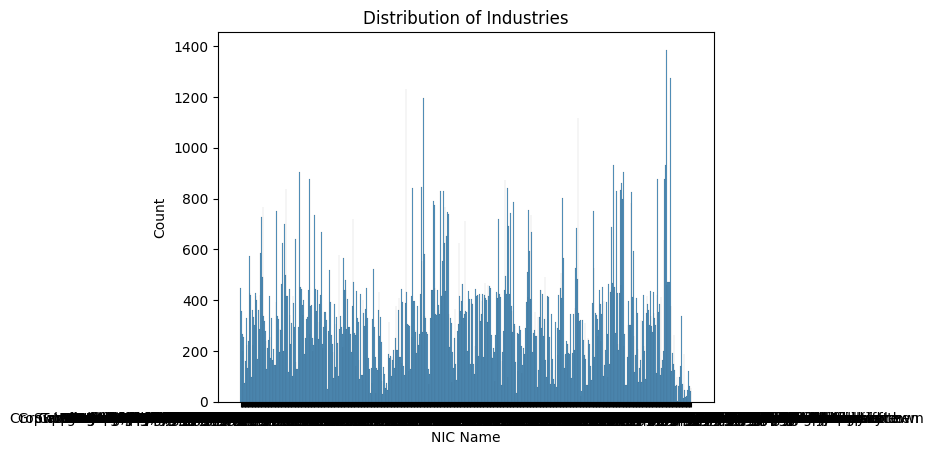

In [116]:
# Visualize distribution of variables
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(merged_df['NIC Name'], bins=20)
plt.title('Distribution of Industries')
plt.show()

In [117]:
merged_df.dtypes

State Code                             object
District Code                          object
India/States                           object
Division                               object
Group                                  object
Class                                  object
NIC Name                               object
Main Workers - Total -  Persons         int64
Main Workers - Total - Males            int64
Main Workers - Total - Females          int64
Main Workers - Rural -  Persons         int64
Main Workers - Rural - Males            int64
Main Workers - Rural - Females          int64
Main Workers - Urban -  Persons         int64
Main Workers - Urban - Males            int64
Main Workers - Urban - Females          int64
Marginal Workers - Total -  Persons     int64
Marginal Workers - Total - Males        int64
Marginal Workers - Total - Females      int64
Marginal Workers - Rural -  Persons     int64
Marginal Workers - Rural - Males        int64
Marginal Workers - Rural - Females

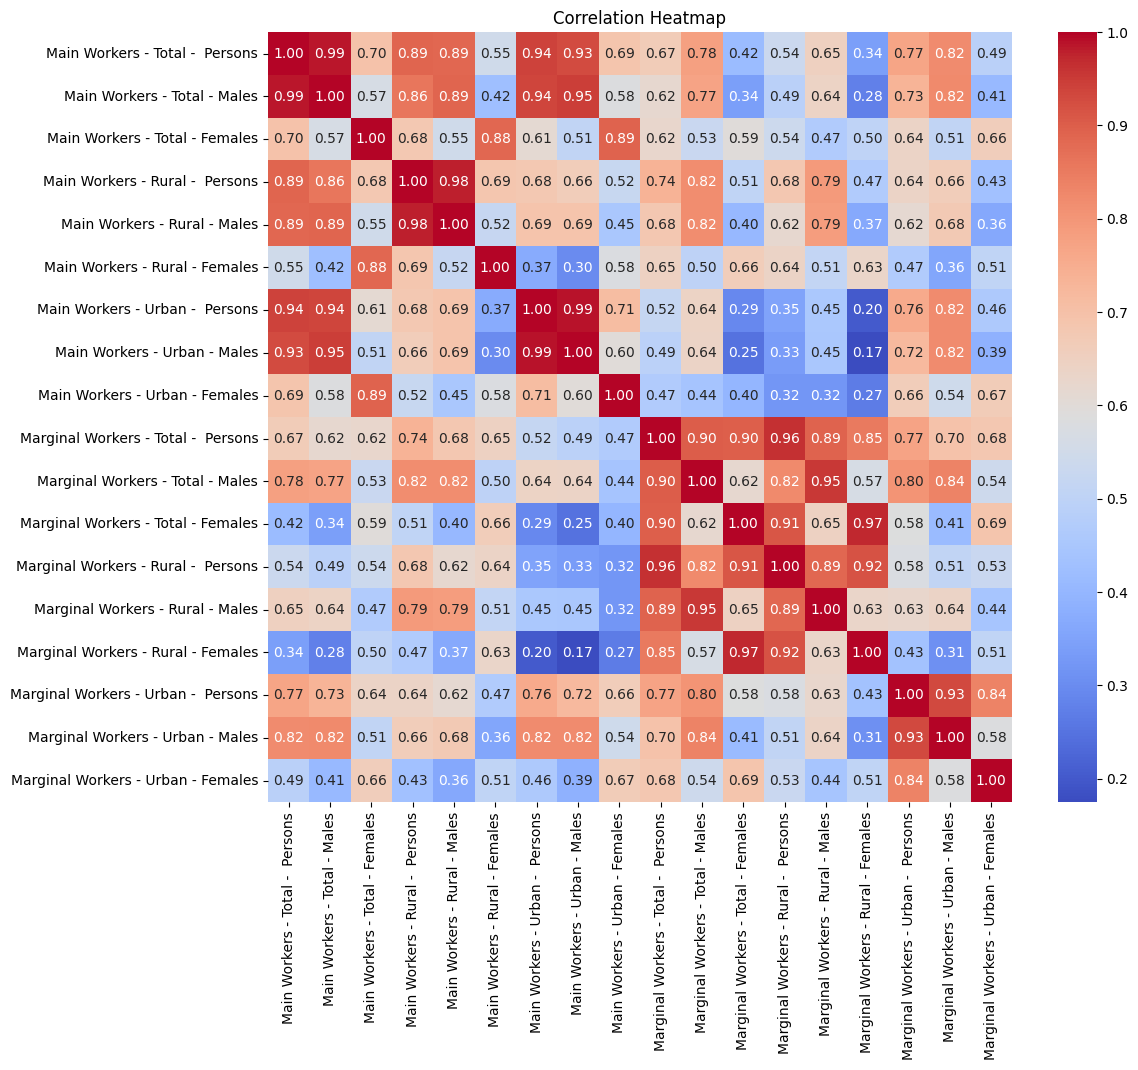

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Exclude non-numeric columns from the correlation calculation
numeric_columns = merged_df.select_dtypes(include=['int64', 'float64']).columns

# Compute the correlation matrix
correlation_matrix = merged_df[numeric_columns].corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [6]:
# Remove duplicate rows from the DataFrame
merged_df = merged_df.drop_duplicates()

# Confirm the removal of duplicates
print("Shape after removing duplicates:", merged_df.shape)

Shape after removing duplicates: (194381, 26)


In [159]:
merged_df['District'].unique()

array(['NCT OF DELHI', 'North West', 'North', 'North East', 'East',
       'New Delhi', 'Central', 'West', 'South West', 'South', 'TRIPURA',
       'West Tripura', 'South Tripura', 'Dhalai', 'North Tripura',
       'JHARKHAND', 'Garhwa', 'Chatra', 'Kodarma', 'Giridih', 'Deoghar',
       'Godda', 'Sahibganj', 'Pakur', 'Dhanbad', 'Bokaro', 'Lohardaga',
       'Purbi Singhbhum', 'Palamu', 'Latehar', 'Hazaribagh', 'Ramgarh',
       'Dumka', 'Jamtara', 'Ranchi', 'Khunti', 'Gumla', 'Simdega',
       'Pashchimi Singhbhum', 'Saraikela-Kharsawan', 'GUJARAT', 'Kachchh',
       'Banas Kantha', 'Patan', 'Mahesana', 'Sabar Kantha', 'Gandhinagar',
       'Ahmadabad', 'Surendranagar', 'Rajkot', 'Jamnagar', 'Porbandar',
       'Junagadh', 'Amreli', 'Bhavnagar', 'Anand', 'Kheda',
       'Panch Mahals', 'Dohad', 'Vadodara', 'Narmada', 'Bharuch',
       'The Dangs', 'Navsari', 'Valsad', 'Surat', 'Tapi', 'MAHARASHTRA',
       'Nandurbar', 'Dhule', 'Jalgaon', 'Buldana', 'Akola', 'Washim',
       'Amravati'

Step 1: Tokenize and Clean Text Data

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


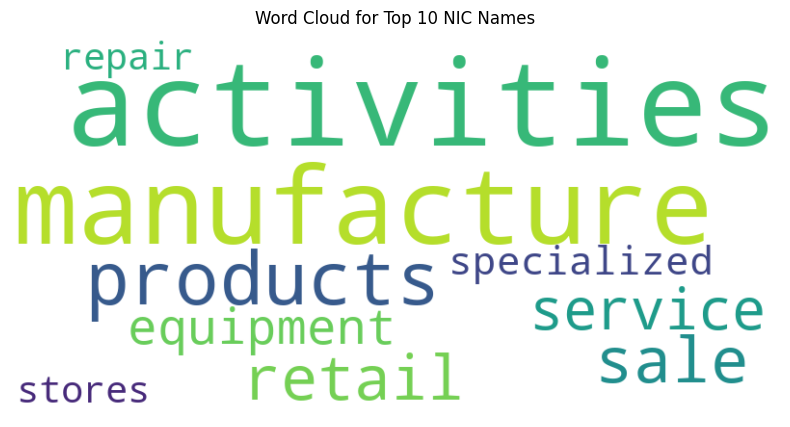

In [164]:
import os
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')


# Tokenize and clean text data
text = ' '.join(merged_df['NIC Name'])
tokens = word_tokenize(text)
tokens = [word.lower() for word in tokens if word.isalpha()]
stop_words = set(stopwords.words('english'))
tokens = [word for word in tokens if word not in stop_words]

# Count word frequency
word_freq = Counter(tokens)
top_words = word_freq.most_common(10)

# Create a word cloud using the top words
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(top_words))

# Display the word cloud
plt.figure(figsize=(20, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Top 10 NIC Names')
plt.axis('off')
plt.show()


In [94]:
import plotly.express as px

# Extract the top 10 most common words and their frequencies
top_words = [pair[0] for pair in word_freq.most_common(10)]
word_counts = [pair[1] for pair in word_freq.most_common(10)]

# Create a bar plot using Plotly
fig = px.bar(x=top_words, y=word_counts, labels={'x': 'Industry', 'y': 'Frequency'}, 
             title='Top 10 Industries by Frequency')
fig.show()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[('activities', 60058), ('manufacture', 46673), ('products', 17992), ('sale', 13293), ('retail', 12669), ('service', 10664), ('equipment', 9911), ('specialized', 8830), ('stores', 7821), ('repair', 7682)]


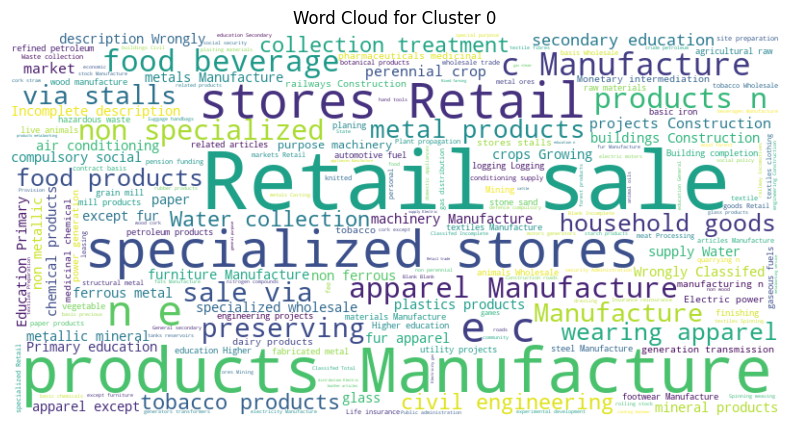

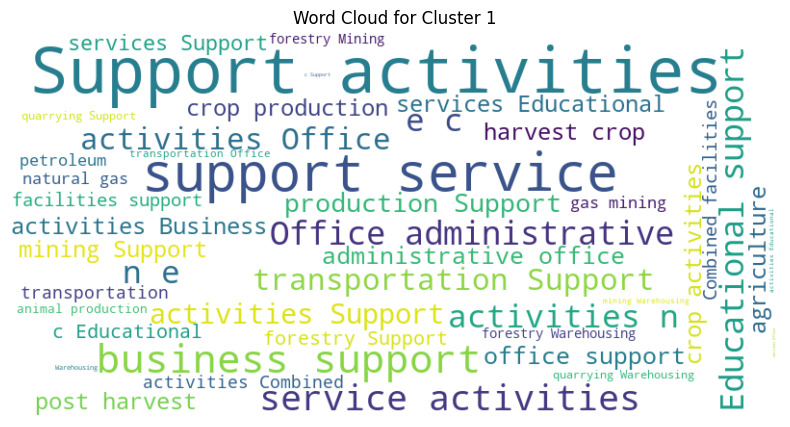

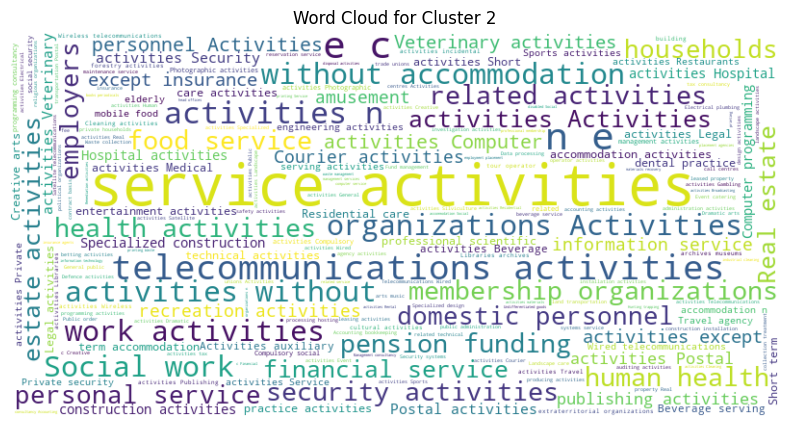

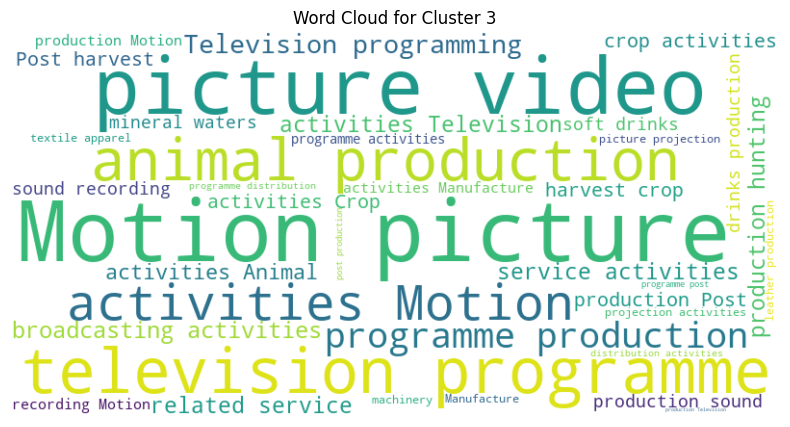

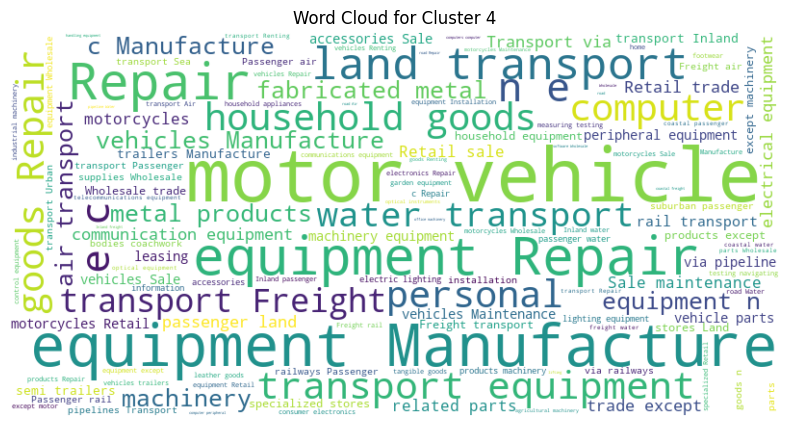

In [161]:
import os
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')

# Function to merge CSV files in a folder
def merge_csv_files(folder_path):
    try:
        # List all CSV files in the folder
        csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

        # Initialize an empty list to store DataFrame objects
        dfs = []

        # Read each CSV file and append its DataFrame to the list
        for file in csv_files:
            file_path = os.path.join(folder_path, file)
            try:
                df = pd.read_csv(file_path, encoding='utf-8')
            except UnicodeDecodeError:
                try:
                    df = pd.read_csv(file_path, encoding='latin-1')
                except UnicodeDecodeError:
                    df = pd.read_csv(file_path, encoding='ISO-8859-1')
            dfs.append(df)

        # Concatenate all DataFrames into a single DataFrame
        merged_df = pd.concat(dfs, ignore_index=True)
        
        return merged_df
    except Exception as e:
        print("An error occurred:", e)

# Specify the folder path containing CSV files
folder_path = 'C:/Users/hp/Downloads/zen class 1/project/DataSets-20240430T111853Z-001/DataSets'

# Merge CSV files in the folder
merged_df = merge_csv_files(folder_path)

# Tokenize and clean text data
text = ' '.join(merged_df['NIC Name'])
tokens = word_tokenize(text)
tokens = [word.lower() for word in tokens if word.isalpha()]
stop_words = set(stopwords.words('english'))
tokens = [word for word in tokens if word not in stop_words]

# Count word frequency
word_freq = Counter(tokens)
print(word_freq.most_common(10))

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X_tfidf = tfidf_vectorizer.fit_transform(merged_df['NIC Name'])

# KMeans Clustering
num_clusters = 5  # Adjust the number of clusters as needed
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
merged_df['Cluster'] = kmeans.fit_predict(X_tfidf)

# Generate word clouds for each cluster
for cluster in range(num_clusters):
    text_for_cluster = merged_df[merged_df['Cluster'] == cluster]['NIC Name']
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text_for_cluster))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Cluster {cluster}')
    plt.axis('off')
    plt.show()


In [118]:
merged_df["State Name"]

1         NCT OF DELHI
2         NCT OF DELHI
3         NCT OF DELHI
4         NCT OF DELHI
5         NCT OF DELHI
              ...     
195137            None
195139            None
195140            None
195143            None
195144            None
Name: State Name, Length: 194381, dtype: object

Explanation:
TF-IDF Vectorization:
Converts the text data in the 'NIC Name' column into a numerical format.

Scaling Numerical Data:
Scales other numerical columns to ensure they contribute equally to the clustering process.

Combining Features:
Combines the TF-IDF features with the scaled numerical data.

Clustering:
Applies KMeans clustering to the combined features.

Visualizations:
Creates scatter plots and box plots to visualize the distribution of clusters and the relationship between various features.

Step 2: Vectorize the Text Data

In [120]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Vectorize the 'NIC Name' column using TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english')
nic_name_tfidf = vectorizer.fit_transform(merged_df['NIC Name'])



<194381x692 sparse matrix of type '<class 'numpy.float64'>'
	with 734488 stored elements in Compressed Sparse Row format>

Step 3: Apply Clustering Algorithm

In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
# Step 2: Scale the numerical columns for clustering
scaler = StandardScaler()
numerical_columns = [
    'Main Workers - Total -  Persons', 'Main Workers - Total - Males', 'Main Workers - Total - Females',
    'Main Workers - Rural -  Persons', 'Main Workers - Rural - Males', 'Main Workers - Rural - Females',
    'Main Workers - Urban -  Persons', 'Main Workers - Urban - Males', 'Main Workers - Urban - Females',
    'Marginal Workers - Total -  Persons', 'Marginal Workers - Total - Males', 'Marginal Workers - Total - Females',
    'Marginal Workers - Rural -  Persons', 'Marginal Workers - Rural - Males', 'Marginal Workers - Rural - Females',
    'Marginal Workers - Urban -  Persons', 'Marginal Workers - Urban - Males', 'Marginal Workers - Urban - Females'
]
numerical_data_scaled = scaler.fit_transform(merged_df[numerical_columns])

# Step 3: Combine TF-IDF features with scaled numerical data
from scipy.sparse import hstack
combined_features = hstack([nic_name_tfidf, numerical_data_scaled])

# Step 4: Determine the number of clusters and fit the KMeans model
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
merged_df['Cluster'] = kmeans.fit_predict(combined_features)

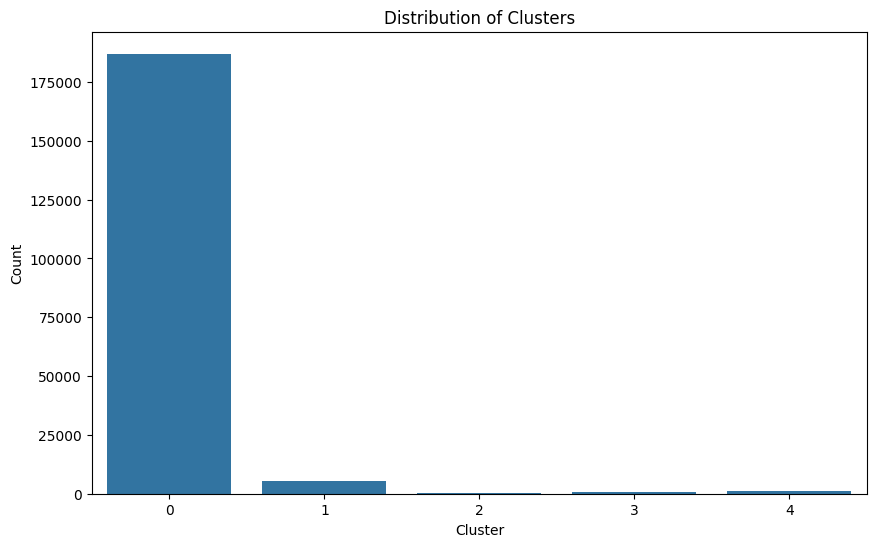

In [124]:
# Visualize the clustering results
plt.figure(figsize=(10, 6))
sns.countplot(x='Cluster', data=merged_df)
plt.title('Distribution of Clusters')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

Main Workers

Step 1: Identify Top 10 Most Frequent 'NIC Name' Categories

In [125]:
# Count the frequency of each 'NIC Name'
nic_name_counts = merged_df['NIC Name'].value_counts()

# Get the top 10 most frequent 'NIC Name' categories
top_10_nic_names = nic_name_counts.head(10).index.tolist()


Step 2: Filter the DataFrame to Include Only Top 10 'NIC Name' Categories

In [126]:
# Filter the DataFrame to include only rows where 'NIC Name' is in the top 10 most frequent categories
top_10_merged_df = merged_df[merged_df['NIC Name'].isin(top_10_nic_names)]


Step 3: Create the Box Plot

c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.



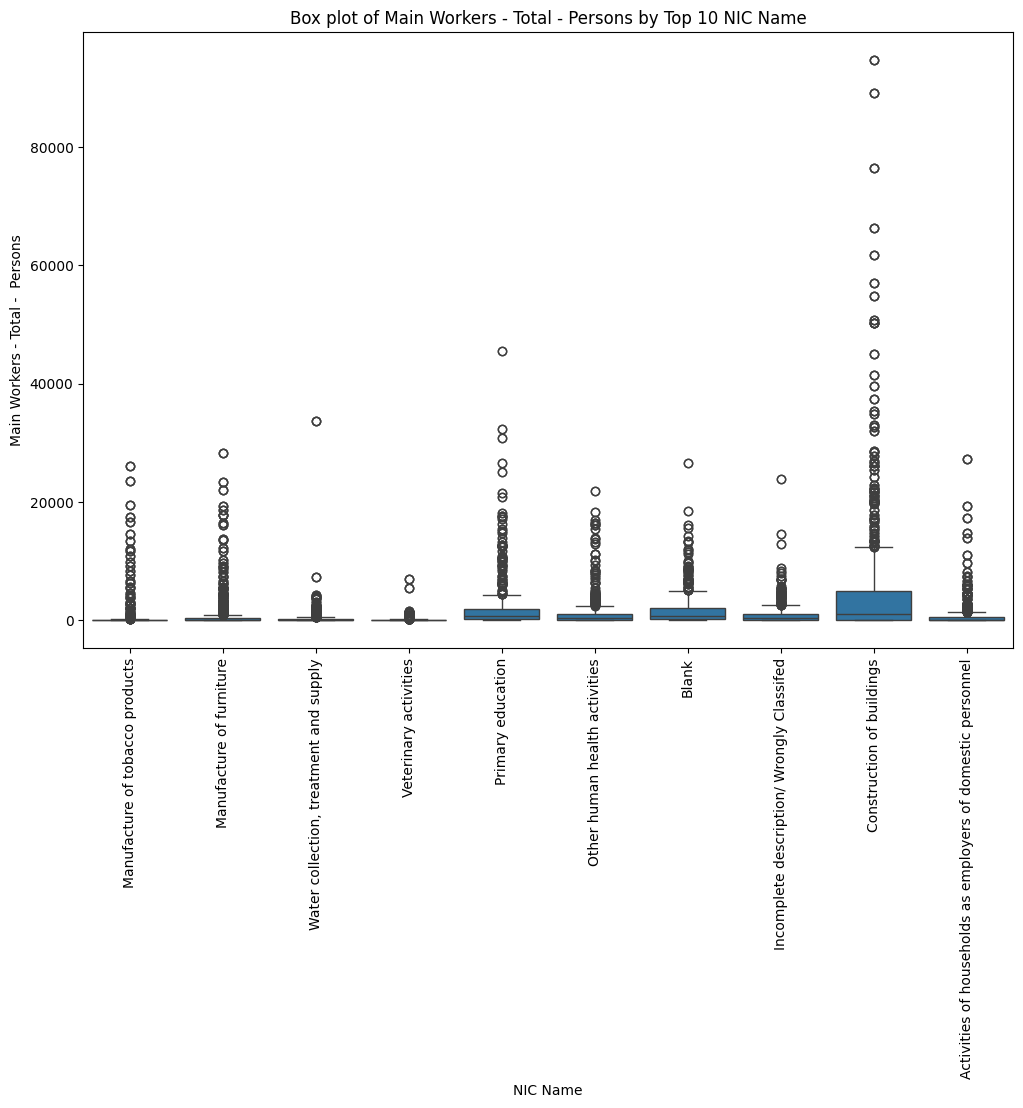

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns

# Box plot for 'Main Workers - Total - Persons' based on top 10 'NIC Name'
plt.figure(figsize=(12, 8))
sns.boxplot(x='NIC Name', y='Main Workers - Total -  Persons', data=top_10_merged_df)
plt.title('Box plot of Main Workers - Total - Persons by Top 10 NIC Name')
plt.xticks(rotation=90)
plt.show()


Step 4: Create Scatter Plots for Main Workers - Total - Persons

Plot: Main Workers - Total - Persons vs Main Workers - Rural - Persons

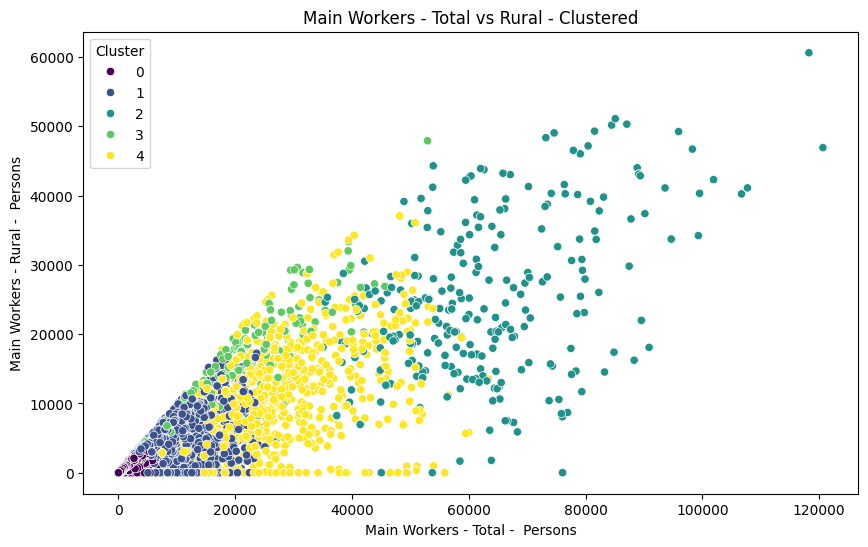

In [128]:



# Scatter plot for 'Main Workers - Total - Persons' vs 'Main Workers - Rural - Persons'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Main Workers - Total -  Persons', y='Main Workers - Rural -  Persons', hue='Cluster', data=merged_df, palette='viridis')
plt.title('Main Workers - Total vs Rural - Clustered')
plt.xlabel('Main Workers - Total -  Persons')
plt.ylabel('Main Workers - Rural -  Persons')
plt.show()



Plot: Main Workers - Total - Persons vs Main Workers - Urban - Persons

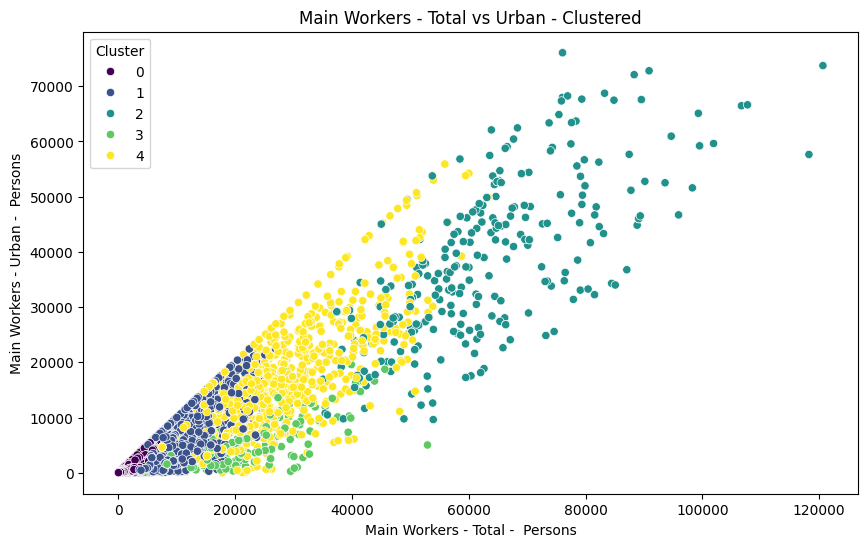

In [131]:
# Scatter plot for 'Main Workers - Total - Persons' vs 'Main Workers - Urban - Persons'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Main Workers - Total -  Persons', y='Main Workers - Urban -  Persons', hue='Cluster', data=merged_df, palette='viridis')
plt.title('Main Workers - Total vs Urban - Clustered')
plt.xlabel('Main Workers - Total -  Persons')
plt.ylabel('Main Workers - Urban -  Persons')
plt.show()





Marginal Workers

Step 5: Create the Box Plot for Marginal Workers - Total - Persons

c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:632: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.



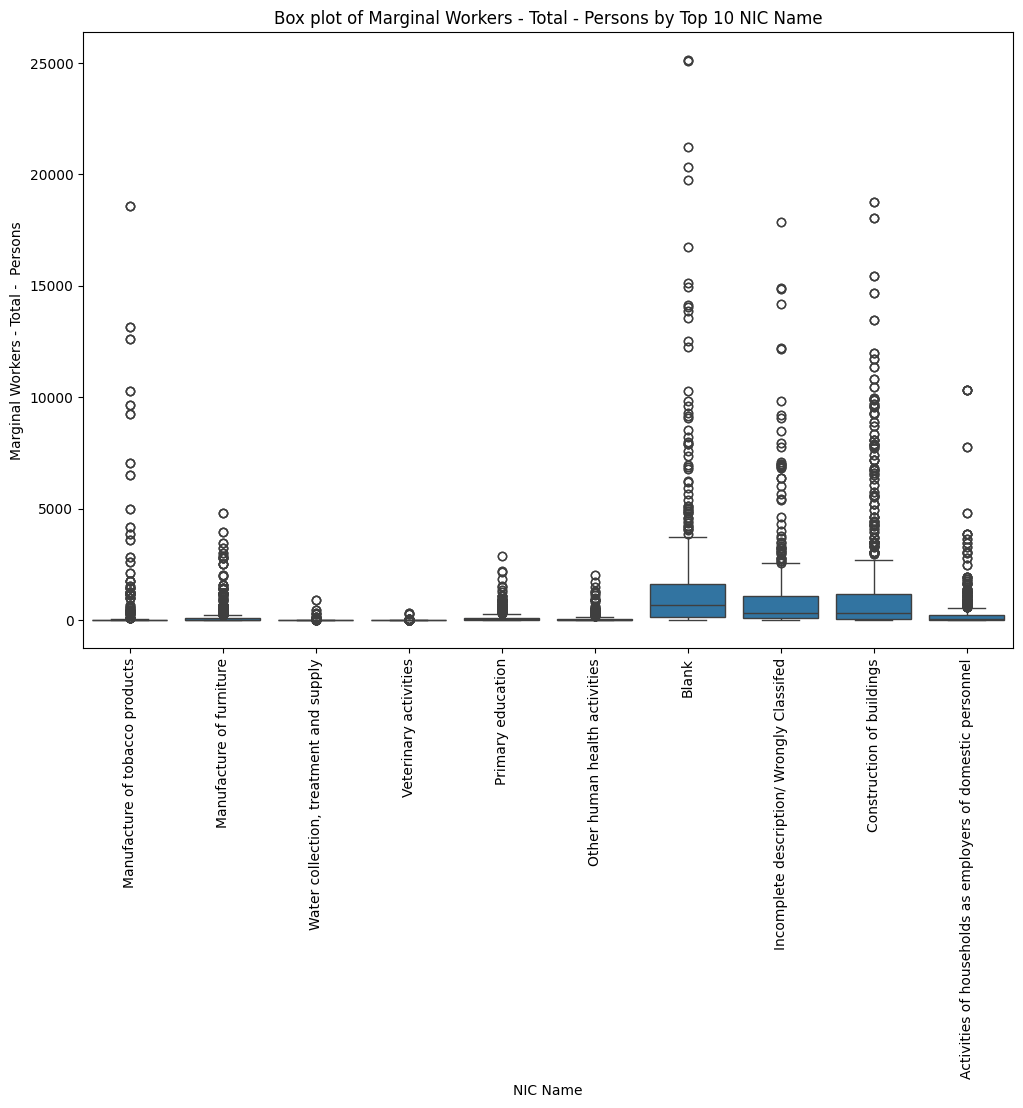

In [130]:
# Box plot for 'Marginal Workers - Total - Persons' based on top 10 'NIC Name'
plt.figure(figsize=(12, 8))
sns.boxplot(x='NIC Name', y='Marginal Workers - Total -  Persons', data=top_10_merged_df)
plt.title('Box plot of Marginal Workers - Total - Persons by Top 10 NIC Name')
plt.xticks(rotation=90)
plt.show()


Step 6: Create Scatter Plots for Marginal Workers - Total - Persons

Plot: Marginal Workers - Total - Persons vs Marginal Workers - Rural - Persons

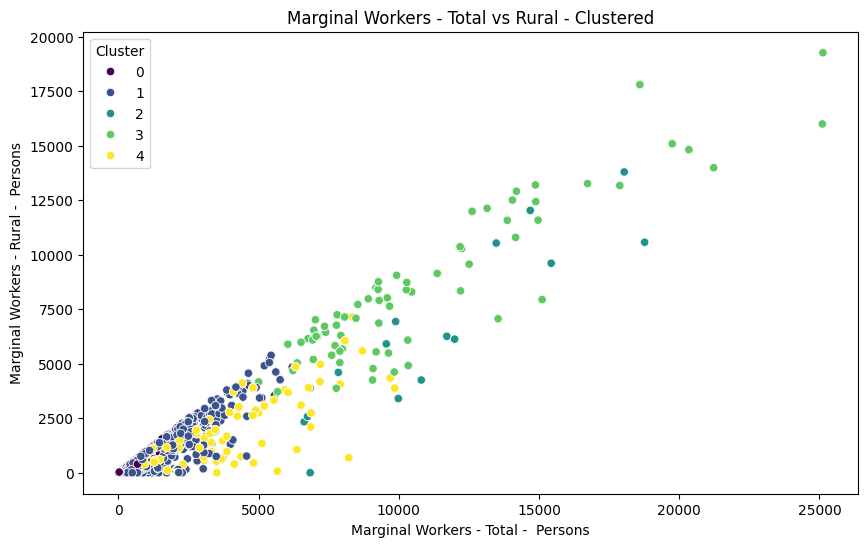

In [132]:
# Scatter plot for 'Marginal Workers - Total - Persons' vs 'Marginal Workers - Rural - Persons'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Marginal Workers - Total -  Persons', y='Marginal Workers - Rural -  Persons', hue='Cluster', data=top_10_merged_df, palette='viridis')
plt.title('Marginal Workers - Total vs Rural - Clustered')
plt.xlabel('Marginal Workers - Total -  Persons')
plt.ylabel('Marginal Workers - Rural -  Persons')
plt.show()




Scatter plot for 'Marginal Workers - Total - Persons' vs 'Marginal Workers - Urban - Persons'

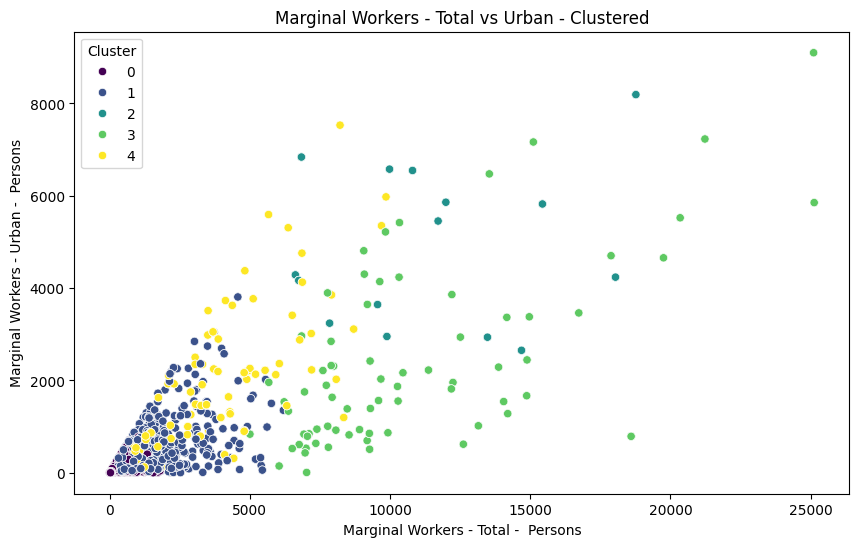

In [133]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Marginal Workers - Total -  Persons', y='Marginal Workers - Urban -  Persons', hue='Cluster', data=top_10_merged_df, palette='viridis')
plt.title('Marginal Workers - Total vs Urban - Clustered')
plt.xlabel('Marginal Workers - Total -  Persons')
plt.ylabel('Marginal Workers - Urban -  Persons')
plt.show()

In [74]:
merged_df

State Code District Code                India/States Division Group  \
0             `07          `000        STATE - NCT OF DELHI      `00  `000   
1             `07          `000        STATE - NCT OF DELHI      `01  `000   
2             `07          `000        STATE - NCT OF DELHI      `01  `011   
3             `07          `000        STATE - NCT OF DELHI      `01  `011   
4             `07          `000        STATE - NCT OF DELHI      `01  `011   
...           ...           ...                         ...      ...   ...   
195140        `19          `345  District - Purba Medinipur      `99  `990   
195141        `19          `345  District - Purba Medinipur      `99  `991   
195142        `19          `345  District - Purba Medinipur      `99  `991   
195143        `19          `345  District - Purba Medinipur      `99  `992   
195144        `19          `345  District - Purba Medinipur      `99  `992   

        Class                                           NIC Name  \
0       `0000                                              Total   
1       `0000  Crop and animal production, hunting and relate...   
2       `0000                     Growing of non-perennial crops   
3       `0111  Growing of cereals (except rice), leguminous c...   
4       `0112                                    Growing of rice   
...       ...                                                ...   
195140  `9900  Activities of extraterritorial organizations a...   
195141  `0000                                              Blank   
195142  `9910                                              Blank   
195143  `0000          Incomplete description/ Wrongly Classifed   
195144  `9920          Incomplete description/ Wrongly Classifed   

        Main Workers - Total -  Persons  Main Workers - Total - Males  \
0                                828980                        708129   
1                                  1484                          1271   
2                                   169                           151   
3                                    83                            81   
4                                     9                             9   
...                                 ...                           ...   
195140                               18                            12   
195141                             8244                          5866   
195142                             8244                          5866   
195143                             8324                          4604   
195144                             8324                          4604   

        Main Workers - Total - Females  ...  \
0                               120851  ...   
1                                  213  ...   
2                                   18  ...   
3                                    2  ...   
4                                    0  ...   
...                                ...  ...   
195140                               6  ...   
195141                            2378  ...   
195142                            2378  ...   
195143                            3720  ...   
195144                            3720  ...   

        Marginal Workers - Total - Females  \
0                                    16266   
1                                       74   
2                                       27   
3                                       10   
4                                        0   
...                                    ...   
195140                                   0   
195141                               17103   
195142                               17103   
195143                               11520   
195144                               11520   

        Marginal Workers - Rural -  Persons  Marginal Workers - Rural - Males  \
0                                      1969                              1494   
1                                        23                                13   
2              

Model building

In [135]:
import pandas as pd

# Check for non-numeric values in a DataFrame
def check_non_numeric(df):
    non_numeric_cols = []
    for col in df.columns:
        try:
            pd.to_numeric(df[col])
        except ValueError:
            non_numeric_cols.append(col)
    return non_numeric_cols

# Call the function to check for non-numeric values
non_numeric_columns = check_non_numeric(merged_df)
print("Columns with non-numeric values:", non_numeric_columns)


Columns with non-numeric values: ['State Code', 'District Code', 'India/States', 'Division', 'Group', 'Class', 'NIC Name', 'STATE', 'District', 'State Name']


In [136]:
# Remove backticks from the 'Class' column
merged_df['Class'] = merged_df['Class'].str.replace('`', '')

# Convert 'Class' column to numeric
merged_df['Class'] = pd.to_numeric(merged_df['Class'], errors='coerce')

In [137]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder


# Initialize an instance of TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the 'NIC Name' column to convert text data into numerical vectors
X_nic_name = tfidf_vectorizer.fit_transform(merged_df['NIC Name'])

# Define columns to encode
columns_to_encode = ['State Code', 'District Code','India/States', 'Division', 'Group','NIC Name']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical columns
for column in columns_to_encode:
    merged_df[column] = label_encoder.fit_transform(merged_df[column])

# Check data types after encoding
print(merged_df.dtypes)

# Now, X_nic_name contains the TF-IDF transformed 'NIC Name' data, and merged_df_encoded contains the encoded categorical variables.



State Code                              int32
District Code                           int32
India/States                            int32
Division                                int32
Group                                   int32
Class                                   int64
NIC Name                                int32
Main Workers - Total -  Persons         int64
Main Workers - Total - Males            int64
Main Workers - Total - Females          int64
Main Workers - Rural -  Persons         int64
Main Workers - Rural - Males            int64
Main Workers - Rural - Females          int64
Main Workers - Urban -  Persons         int64
Main Workers - Urban - Males            int64
Main Workers - Urban - Females          int64
Marginal Workers - Total -  Persons     int64
Marginal Workers - Total - Males        int64
Marginal Workers - Total - Females      int64
Marginal Workers - Rural -  Persons     int64
Marginal Workers - Rural - Males        int64
Marginal Workers - Rural - Females

In [4]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Check for non-numeric values in a DataFrame
def check_non_numeric(df):
    non_numeric_cols = []
    for col in df.columns:
        try:
            pd.to_numeric(df[col])
        except ValueError:
            non_numeric_cols.append(col)
    return non_numeric_cols

# Remove backticks from the 'Class' column
merged_df['Class'] = merged_df['Class'].str.replace('`', '')

# Convert 'Class' column to numeric
merged_df['Class'] = pd.to_numeric(merged_df['Class'], errors='coerce')

# Initialize an instance of TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the 'NIC Name' column to convert text data into numerical vectors
X_nic_name = tfidf_vectorizer.fit_transform(merged_df['NIC Name'])

# Define columns to encode
columns_to_encode = ['State Code', 'District Code', 'India/States', 'Division', 'Group', 'NIC Name']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical columns
for column in columns_to_encode:
    merged_df[column] = label_encoder.fit_transform(merged_df[column])

# Assuming 'Class' is the target variable
X = merged_df.drop(columns=['Class'])  # Features
y = merged_df['Class']  # Target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Test the model
y_pred = model.predict(X_test)

# Evaluate the model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R² score:', r2_score(y_test, y_pred))


Mean Absolute Error: 1890.2490543245508
Mean Squared Error: 6078041.4006493045
Root Mean Squared Error: 2465.368410734855
R² score: 0.3477439884834913


In [18]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Check for non-numeric values in a DataFrame
def check_non_numeric(df):
    non_numeric_cols = []
    for col in df.columns:
        try:
            pd.to_numeric(df[col])
        except ValueError:
            non_numeric_cols.append(col)
    return non_numeric_cols

# Call the function to check for non-numeric values
non_numeric_columns = check_non_numeric(merged_df)
print("Columns with non-numeric values:", non_numeric_columns)

# Remove backticks from the 'Class' column
merged_df['Class'] = merged_df['Class'].str.replace('`', '')

# Convert 'Class' column to numeric
merged_df['Class'] = pd.to_numeric(merged_df['Class'], errors='coerce')

# Define columns to encode
categorical_features = ['State Code', 'District Code', 'India/States', 'Division', 'Group']
text_column = 'NIC Name'

# Define preprocessing steps for categorical features and text column
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
text_transformer = TfidfVectorizer(stop_words='english')

# Create a preprocessor to apply transformations to appropriate columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('text', text_transformer, text_column)
    ])

# Define the model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Split data into features and target
X = merged_df.drop(columns=['Class'])  # Features
y = merged_df['Class']  # Target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R² score:', r2_score(y_test, y_pred))



Columns with non-numeric values: ['State Code', 'District Code', 'India/States', 'Division', 'Group', 'Class', 'NIC Name']
Mean Absolute Error: 1132.3282666547586
Mean Squared Error: 3695445.8490805705
Root Mean Squared Error: 1922.354246511441
R² score: 0.6034287015486544


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Check for non-numeric values in a DataFrame
def check_non_numeric(df):
    non_numeric_cols = []
    for col in df.columns:
        try:
            pd.to_numeric(df[col])
        except ValueError:
            non_numeric_cols.append(col)
    return non_numeric_cols

# Call the function to check for non-numeric values
non_numeric_columns = check_non_numeric(merged_df)
print("Columns with non-numeric values:", non_numeric_columns)

# Remove backticks from the 'Class' column
merged_df['Class'] = merged_df['Class'].str.replace('`', '')

# Convert 'Class' column to numeric
merged_df['Class'] = pd.to_numeric(merged_df['Class'], errors='coerce')

# Define columns to encode
categorical_features = ['State Code', 'District Code', 'India/States', 'Division', 'Group']
text_column = 'NIC Name'

# Define preprocessing steps for categorical features and text column
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
text_transformer = TfidfVectorizer(stop_words='english')

# Create a preprocessor to apply transformations to appropriate columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('text', text_transformer, text_column)
    ])

# Define the model pipeline for logistic regression
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# Split data into features and target
X = merged_df.drop(columns=['Class'])  # Features
y = merged_df['Class']  # Target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
print('Classification Report:')
print(classification_report(y_test, y_pred))



Columns with non-numeric values: ['State Code', 'District Code', 'India/States', 'Division', 'Group', 'Class', 'NIC Name']
